In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
iris = load_iris()
print(type(iris))
print('==============data shape==============')
print('Data', iris.data.shape)
print('Lable', iris.target.shape)
print('First five data :', iris.data[100:149])
print('First five label :', iris.target[100:149])
print('iris dataset keys\n', iris.keys())

<class 'sklearn.utils.Bunch'>
==============data shape==============
Data (150, 4)
Lable (150,)
First five data : [[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]
 [7.6 3.  6.6 2.1]
 [4.9 2.5 4.5 1.7]
 [7.3 2.9 6.3 1.8]
 [6.7 2.5 5.8 1.8]
 [7.2 3.6 6.1 2.5]
 [6.5 3.2 5.1 2. ]
 [6.4 2.7 5.3 1.9]
 [6.8 3.  5.5 2.1]
 [5.7 2.5 5.  2. ]
 [5.8 2.8 5.1 2.4]
 [6.4 3.2 5.3 2.3]
 [6.5 3.  5.5 1.8]
 [7.7 3.8 6.7 2.2]
 [7.7 2.6 6.9 2.3]
 [6.  2.2 5.  1.5]
 [6.9 3.2 5.7 2.3]
 [5.6 2.8 4.9 2. ]
 [7.7 2.8 6.7 2. ]
 [6.3 2.7 4.9 1.8]
 [6.7 3.3 5.7 2.1]
 [7.2 3.2 6.  1.8]
 [6.2 2.8 4.8 1.8]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.1]
 [7.2 3.  5.8 1.6]
 [7.4 2.8 6.1 1.9]
 [7.9 3.8 6.4 2. ]
 [6.4 2.8 5.6 2.2]
 [6.3 2.8 5.1 1.5]
 [6.1 2.6 5.6 1.4]
 [7.7 3.  6.1 2.3]
 [6.3 3.4 5.6 2.4]
 [6.4 3.1 5.5 1.8]
 [6.  3.  4.8 1.8]
 [6.9 3.1 5.4 2.1]
 [6.7 3.1 5.6 2.4]
 [6.9 3.1 5.1 2.3]
 [5.8 2.7 5.1 1.9]
 [6.8 3.2 5.9 2.3]
 [6.7 3.3 5.7 2.5]
 [6.7 3.  5.2 2.3]
 [6.3 2.5 5.

In [ ]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
x = iris.data
y = iris.target.reshape(-1, 1) #Onehot Encoding을 위해 차원추가
print(y[0:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
encoder = OneHotEncoder(sparse=False) # True = 희소행렬 표현방식, 간단한 데이터기에 false로 봄
encoded_y = encoder.fit_transform(y)
print(encoded_y.shape)
print(encoded_y[:5])

(150, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
X_train, X_test, Y_train, Y_test =  train_test_split(x, encoded_y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(120, 4) (120, 3)
(30, 4) (30, 3)


In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax')) #다중분류기에서는 분류클래스 만큼 출력에 설정, 다중분류기 = softmax(확률 값으로)


In [ ]:
opt = Adam(lr=0.001) #스케일링 하지않았기 때문에 발산방지를 위해 learning rate로 
model.compile(opt, loss='categorical_crossentropy', metrics='accuracy')
#다중분류기에서는 loss 'categoricla_crossentropy', metrics 'accuracy' 사용 / 이중분류기일때만 'binary_accuracy'
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               1280      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 1539      
Total params: 101,763
Trainable params: 101,763
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
fit_hist = model.fit(X_train, Y_train,
                     batch_size=5, epochs=5, verbose=1)

Epoch 1/5
24/24 [==============================] - 1s 2ms/step - loss: 0.7313 - accuracy: 0.6417
Epoch 2/5
24/24 [==============================] - 0s 3ms/step - loss: 0.4691 - accuracy: 0.7333
Epoch 3/5
24/24 [==============================] - 0s 3ms/step - loss: 0.2658 - accuracy: 0.9333
Epoch 4/5
24/24 [==============================] - 0s 3ms/step - loss: 0.1827 - accuracy: 0.9333
Epoch 5/5
24/24 [==============================] - 0s 3ms/step - loss: 0.2113 - accuracy: 0.9083


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Final test accuracy :', score[1])

Final test accuracy : 0.9666666388511658


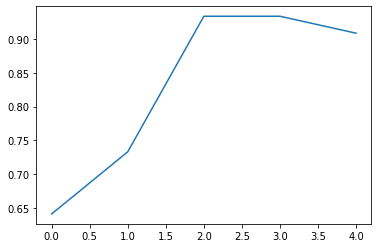

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.show()

In [ ]:
labels = iris.target_names
my_sample = np.random.randint(30)
sample = X_test[my_sample]
sample = sample.reshape(1, 4) #모델에 데이터를 줄때 list형태로 주어야하기 때문에 reshape
pred = model.predict(sample)
print(pred)
print(Y_test[my_sample])
print('Target :', labels[np.argmax(Y_test[my_sample])])
print('Prediction after learning is :', labels[np.argmax(pred)])

[[0.00320909 0.8574803  0.13931066]]
[0. 1. 0.]
Target : versicolor
Prediction after learning is : versicolor
